In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sajidmantang/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv")

In [3]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


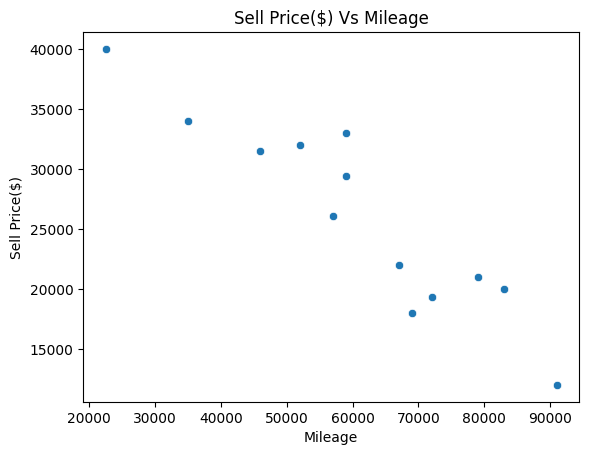

In [4]:
ax = sns.scatterplot(data=df, 
                     x='Mileage', 
                     y='Sell Price($)')
ax.set_title('Sell Price($) Vs Mileage')
plt.show()

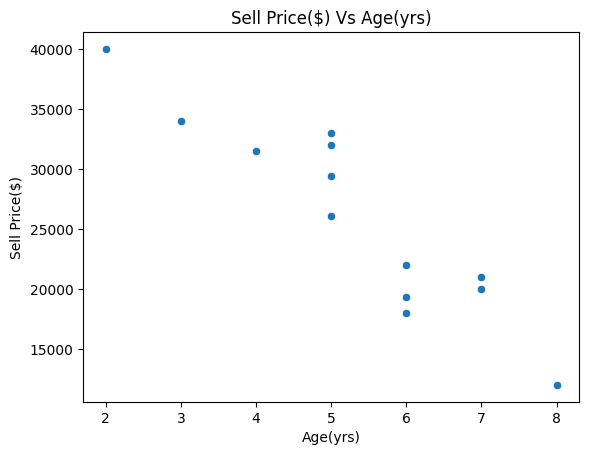

In [5]:
ax = sns.scatterplot(data=df, 
                     y='Sell Price($)', 
                     x='Age(yrs)')
ax.set_title('Sell Price($) Vs Age(yrs)')
plt.show()

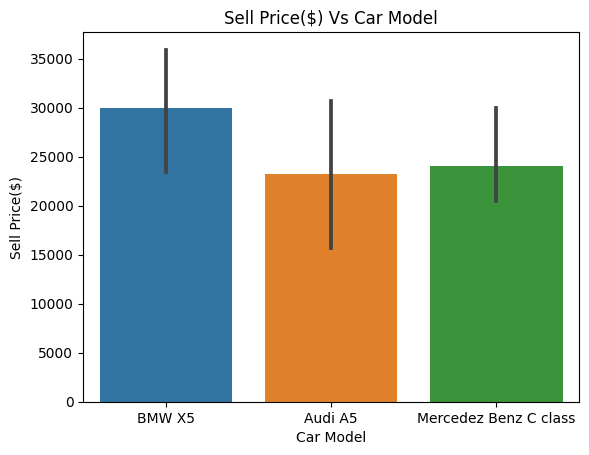

In [6]:
ax = sns.barplot(data=df, 
                 y='Sell Price($)', 
                 x='Car Model')
ax.set_title('Sell Price($) Vs Car Model')
plt.show()

In [7]:
df.groupby('Car Model')['Sell Price($)'].agg(['max', 'mean'])

,max,mean
Car Model,,
Audi A5,32000,23175.0
BMW X5,40000,29920.0
Mercedez Benz C class,33000,24000.0


In [8]:
df.sample(5)

,Car Model,Mileage,Sell Price($),Age(yrs)
9,Mercedez Benz C class,67000,22000,6
8,Audi A5,91000,12000,8
11,Mercedez Benz C class,79000,21000,7
3,BMW X5,22500,40000,2
12,Mercedez Benz C class,59000,33000,5


In [9]:
dummies = pd.get_dummies(df['Car Model'])

In [10]:
merged = pd.concat([df, dummies], axis=1)
merged.head()

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False


In [11]:
final = merged.drop(columns=['Car Model'], axis=1)

In [12]:
final = final.drop(columns='Audi A5', axis=1)

In [13]:
final.columns

Index(['Mileage', 'Sell Price($)', 'Age(yrs)', 'BMW X5',
       'Mercedez Benz C class'],
      dtype='object')

In [14]:
X = final[['Mileage', 'Age(yrs)', 'BMW X5', 'Mercedez Benz C class']]
y = final['Sell Price($)']

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(X,y)

LinearRegression()

In [17]:
reg.predict([[45000, 4, 0, 1]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [18]:
reg.predict([[86000, 7, 1, 0]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [19]:
reg.score(X,y)

0.9417050937281082

# 2

In [20]:
le = LabelEncoder()

In [21]:
dfle = df.copy()
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])

In [22]:
dfle.sample(5)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
10,2,83000,20000,7
1,1,35000,34000,3
4,1,46000,31500,4
8,0,91000,12000,8


In [23]:
X = dfle[['Car Model', 'Mileage', 'Age(yrs)']].values

In [24]:
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [25]:
y = dfle['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [26]:
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder='passthrough')

In [27]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [28]:
X = X[:,1:]

In [33]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [29]:
X #BMW, Marcedez, Mileage, Age

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [31]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [34]:
model.predict([[0, 1, 45000, 4]])

array([36991.31721062])

In [36]:
model.predict([[1, 0, 86000, 7]])

array([11080.74313219])

In [37]:
model.score(X,y)

0.9417050937281082